In [5]:
%matplotlib inline
import pandas as pd

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Kahit pader gigibain ko!,1998
1,Siraa Fil-Wadi,1954
2,My Dinner with Jimi,2003
3,Vyyti zamuzh za kapitana,1985
4,Rowdy Cheetah,2001


In [8]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [73]:
# use value_counts()
titles.title.value_counts().head(10)

Hamlet                  19
Carmen                  16
Macbeth                 15
The Outsider            11
The Three Musketeers    11
Othello                 11
Hero                    11
Maya                    11
Freedom                 11
Vengeance               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [33]:
titles[(titles.year > 1929) & (titles.year < 1940)].year.value_counts().head(3)

1937    1191
1936    1133
1938    1126
Name: year, dtype: int64

In [48]:
titles[((titles.year // 10 * 10) == 1930)].year.value_counts().head(3)

1937    1191
1936    1133
1938    1126
Name: year, dtype: int64

In [52]:
t = titles[(titles.year // 10 * 10) ==  1930]
t.year.value_counts().head(3)

1937    1191
1936    1133
1938    1126
Name: year, dtype: int64

In [76]:
type(t)

pandas.core.series.Series

### Plot the number of films that have been released each decade over the history of cinema.

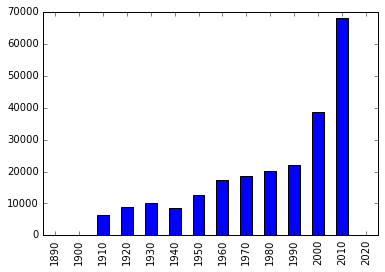

In [56]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

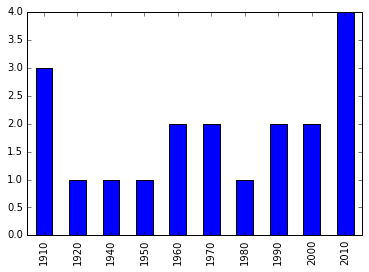

In [60]:
t = titles[titles.title == "Hamlet"]
t = (t.year // 10 * 10)
t.value_counts().sort_index().plot(kind='bar')

In [61]:
len(titles[titles.title == "Hamlet"])
# checks out!

19

### Plot the number of "Rustler" characters in each decade of the history of film.

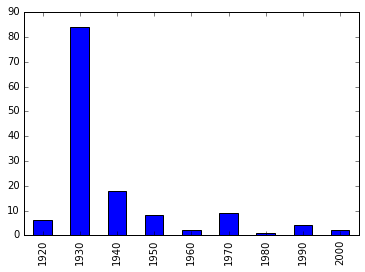

In [94]:
c = cast
c = c[c.character=="Rustler"]  # filter on Rustler character name
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

# one liner: (c.year // 10 * 10)[c.character=="Rustler"].sort_index().value_counts().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

Number of Hamlet chars total:  90


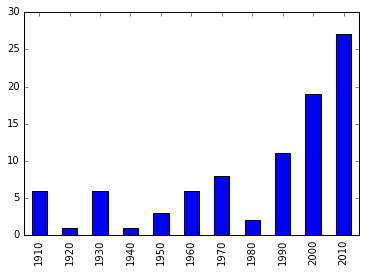

In [93]:
c = cast
c = c[c.character=="Hamlet"]                        # filter
#c.character.value_counts()                         # count - only one bucket, total number of hamlet characters
print("Number of Hamlet chars total: ",len(c))      # Same as value count since it's pre-filtered, only one bucket
s = (c.year // 10 * 10).value_counts()              # gen series with value_counts()
s.sort_index().plot(kind='bar')                     # sort by index (year)

### What are the 11 most common character names in movie history?

In [72]:
c = cast
c.character.value_counts().head(11)

Himself        19489
Dancer         11898
Extra          10762
Reporter        8074
Doctor          7359
Student         7065
Policeman       6824
Party Guest     6683
Nurse           6576
Bartender       6536
Minor Role      6178
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [97]:
c = cast
c = c[c.character=="Herself"]
c.name.value_counts().head(10)

Joyce Brothers        13
Queen Elizabeth II    11
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Caroline Rhea          5
Bunny Yeager           5
Rekha                  5
Hillary Clinton        5
Marilyn Monroe         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [100]:
c = cast
c[c.character=="Himself"].name.value_counts().head(10)

Adolf Hitler             98
Richard Nixon            45
Ronald Reagan            37
John F. Kennedy          31
George W. Bush           23
Ron Jeremy               23
Winston Churchill        22
Benito Mussolini         22
Franklin D. Roosevelt    20
Bill Clinton             20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [102]:
c = cast
c[c.year==1945].name.value_counts()

Emmett Vogan                   39
Sam (II) Harris                32
Bess Flowers                   29
Harold Miller                  29
Nolan Leary                    27
Frank O'Connor                 27
Franklyn Farnum                25
Larry Steers                   25
Edmund Cobb                    24
Tom London                     24
Pierre Watkin                  24
Charles Sullivan               24
Herman Hack                    24
Kenner G. Kemp                 23
Addison Richards               23
Horace B. Carpenter            23
Bud Osborne                    23
Arthur Loft                    22
Lee Phelps                     22
Budd Buster                    22
Jack Ingram                    22
Chester Clute                  22
Byron Foulger                  22
Al Ferguson                    21
Jack O'Shea                    21
Rex Lease                      21
James Conaty                   21
Edward Gargan                  21
Beverly Reedy                  20
James Flavin  

### Which actors or actresses appeared in the most movies in the year 1985?

In [103]:
c = cast
c[c.year==1985].name.value_counts()

Mammootty                      21
Shakti Kapoor                  21
Sukumari                       19
Mohanlal                       15
Lou Scheimer                   15
Raj Babbar                     15
Aruna Irani                    15
Rajesh Khanna                  13
Deven Verma                    13
Jagdish Raj                    12
Asrani                         12
Pinchoo Kapoor                 12
Om Shivpuri                    12
Satyendra Kapoor               12
Iftekhar                       11
Yunus Parvez                   11
Innocent Vareed Thekkethala    11
Thilakan                       11
Danny Denzongpa                11
Madan Puri                     10
Sharat Saxena                  10
Rati Agnihotri                 10
Jagathi Sreekumar              10
Shobana                        10
Kulbhushan Kharbanda           10
Vikas Anand                     9
Sudhir                          9
Smita Patil                     9
Huma Khan                       9
Mithun Chakrab

### Plot how many roles Mammootty has played in each year of his career.

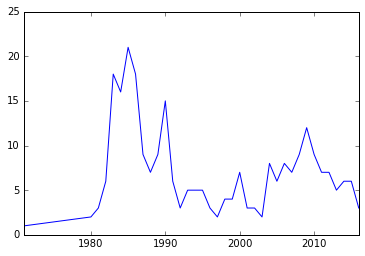

In [108]:
c = cast
c = c[c.name=="Mammootty"]       # filter out other actors
s = c.year.value_counts()        # gen year value_counts() series
s.sort_index().plot()            # sort by the index (year) and plot
#c.year.value_counts().sort_index().plot()

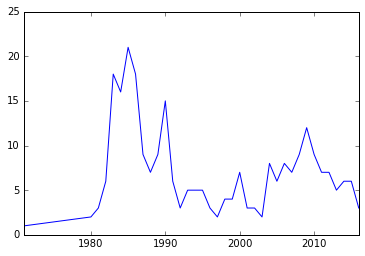

In [109]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [115]:
c = cast
c = c[c.character.str.startswith("Patron in")]
c.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in cabaret                3
Patron in Restaurant             3
Patron in Club                   3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [125]:
c = cast
flt = c.character.str.startswith("Science")
print("type(flt):", type(flt))
c = c[flt]
print("type(c):", type(c))
s = c.character
print("type(s):", type(s))
s2 = s.value_counts().head(10)
print("type(s2):", type(s2))
s2

type(flt): <class 'pandas.core.series.Series'>
type(c): <class 'pandas.core.frame.DataFrame'>
type(s): <class 'pandas.core.series.Series'>
type(s2): <class 'pandas.core.series.Series'>


Science Teacher         58
Science Fair Student     9
Science Student          9
Science Kid              6
Science Promo Cadet      5
Science Club Member      5
Science Fair Judge       5
Science Reporter         5
Science                  3
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

Judy has been important in  48 movies


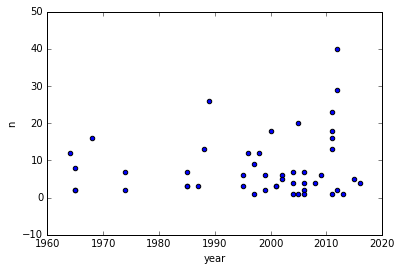

In [136]:
c = cast
j = c[c.name=="Judi Dench"]
j = j[j.n.notnull()]
print("Judy has been important in ",len(j),"movies")
j.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

Cary Grant movies:  75


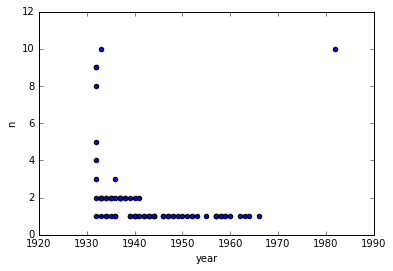

In [141]:
c = cast
c = c[c.name=="Cary Grant"]
c = c[c.n.notnull()]
print("Cary Grant movies: ", len(c))
c.plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

Sidney Poitier movies:  42


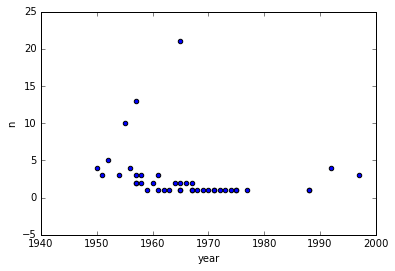

In [142]:
c = cast
c = c[c.name=="Sidney Poitier"]
c = c[c.n.notnull()]
print("Sidney Poitier movies: ", len(c))
c.plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [155]:
m,f = cast, cast
m = m[(m.year // 10 == 195) & (m.type == "actor") & (m.n==1)]
f = f[(f.year // 10 == 195) & (f.type == 'actress') & (f.n==1)]
print("Leading roles in 1950's, actors:", len(m),"actresses: ", len(f),"{",m.n.value_counts(),",",f.n.value_counts(),"}")

Leading roles in 1950's, actors: 6575 actresses:  2945 { 1.0    6575
Name: n, dtype: int64 , 1.0    2945
Name: n, dtype: int64 }


In [157]:
c = cast
c = c[(c.year // 10 == 195) & (c.n == 1)]
c.type.value_counts()

actor      6575
actress    2945
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [158]:
c = cast
c = c[(c.year // 10 == 195) & (c.n == 2)]
c.type.value_counts()

actor      4539
actress    4528
Name: type, dtype: int64